In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
train_data = pd.read_csv("train_data.txt", delimiter=":::", engine="python", header=None, names=["ID", "Title", "Genre", "Plot"])
test_data = pd.read_csv("test_data.txt", delimiter=":::", engine="python", header=None, names=["ID", "Title", "Plot"])

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [ ]:
train_data['Processed_Plot'] = train_data['Plot'].apply(preprocess_text)
test_data['Processed_Plot'] = test_data['Plot'].apply(preprocess_text)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train = vectorizer.fit_transform(train_data['Processed_Plot'])
y_train = train_data['Genre']

In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train_split, y_train_split)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00        15
       adult        0.00      0.00      0.00        11
   adventure        0.00      0.00      0.00         8
   animation        0.00      0.00      0.00         6
   biography        0.00      0.00      0.00         4
      comedy        0.46      0.08      0.14        74
       crime        0.00      0.00      0.00         6
 documentary        0.56      0.86      0.68       160
       drama        0.37      0.90      0.52       154
      family        0.00      0.00      0.00        10
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         2
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        23
       music        0.00      0.00      0.00        16
     musical        0.00      0.00      0.00         2
     mystery        0.00      0.00      0.00         2
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_test = vectorizer.transform(test_data['Processed_Plot'])
test_predictions = model.predict(X_test)

In [ ]:
test_data['Predicted_Genre'] = test_predictions
test_data.to_csv("predicted_genres.csv", index=False)

In [ ]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00        15
       adult        0.00      0.00      0.00        11
   adventure        0.00      0.00      0.00         8
   animation        0.00      0.00      0.00         6
   biography        0.00      0.00      0.00         4
      comedy        0.46      0.08      0.14        74
       crime        0.00      0.00      0.00         6
 documentary        0.56      0.86      0.68       160
       drama        0.37      0.90      0.52       154
      family        0.00      0.00      0.00        10
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         2
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        23
       music        0.00      0.00      0.00        16
     musical        0.00      0.00      0.00         2
     mystery        0.00      0.00      0.00         2
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_test = vectorizer.transform(test_data['Processed_Plot'])
test_predictions = model.predict(X_test)

In [ ]:
test_data['Predicted_Genre'] = test_predictions
test_data.to_csv("predicted_genres.csv", index=False)


In [ ]:
# Sample new movie description
new_description = "A young woman discovers she has inherited a farm from her estranged grandmother. She decides to visit the farm and uncover the secrets of her family's past."


In [ ]:
# Preprocess the new description
processed_description = preprocess_text(new_description)

In [ ]:
# Vectorize the preprocessed description using the same vectorizer used for training
X_new = vectorizer.transform([processed_description])

In [ ]:
# Make prediction using the trained model
predicted_genre = model.predict(X_new)


In [ ]:
print("Predicted Genre:", predicted_genre)

Predicted Genre: [' drama ']


In [ ]:
# Sample new movie description
new_description = "A group of friends embark on a thrilling adventure to uncover a hidden treasure in the heart of the jungle."

# Preprocess the new description
processed_description = preprocess_text(new_description)

# Vectorize the preprocessed description using the same vectorizer used for training
X_new = vectorizer.transform([processed_description])

# Make prediction using the trained model
predicted_genre = model.predict(X_new)

print("Predicted Genre:", predicted_genre)

Predicted Genre: [' drama ']


In [ ]:
# Sample new movie description
new_description = "A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home."

# Preprocess the new description
processed_description = preprocess_text(new_description)

# Vectorize the preprocessed description using the same vectorizer used for training
X_new = vectorizer.transform([processed_description])

# Make prediction using the trained model
predicted_genre = model.predict(X_new)

print("Predicted Genre:", predicted_genre)


Predicted Genre: [' drama ']


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val,y_pred)
cm

array([[  0,   0,   0,   0,   0,   0,   0,   2,  13,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   1,  10,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   6,   0,  11,  57,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   

<Axes: >

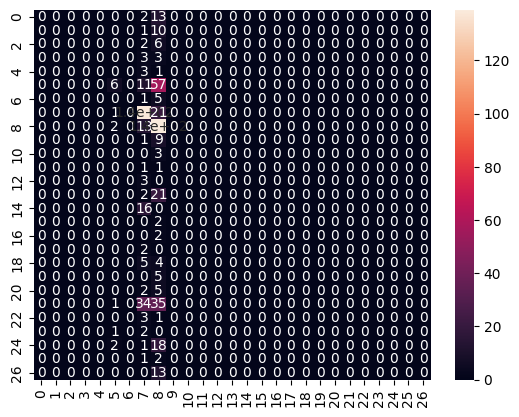

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


test_data.head()

train_data.head()

Accuracy: 0.4449685534591195


,ID,Title,Genre,Plot,Processed_Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents oscar le...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers bodies ground zero also stat...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000,ngram_range=(1,2))


In [ ]:
from sklearn.linear_model import LogisticRegression
clf_model = LogisticRegression()

In [ ]:
import pickle


In [ ]:
pickle.dump(cv,open('cv.pkl','wb'))

In [ ]:
pickle.dump(clf_model,open('model.pkl','wb'))